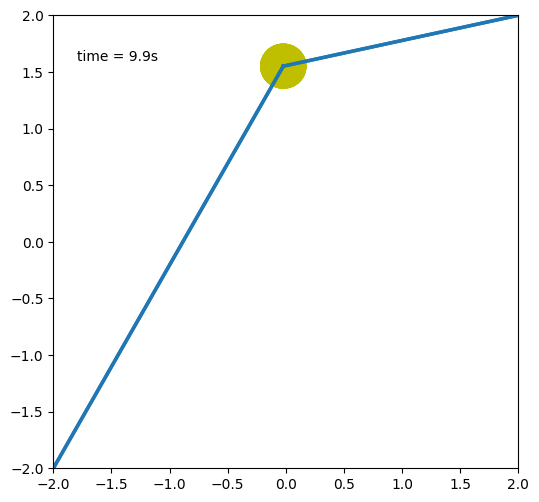

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Creating the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)

# Setting a scale on the viewing window
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

# Setting up the time parameters
tStart = 0.0
timeDuration = 10.0
tStop = tStart + timeDuration
dt = 0.1
NumberOfSteps = int((tStop - tStart)/dt)

# Initial positions and velocities
x = 0.5
y = 1.0
vx = 15.0
vy = 30.0

# Spring's natural length, strength and air resistance
L1 = 1.0
L2 = 1.0
K1 = 2.0
K2 = 3.0
C = 0.1
g = 1.0
m = 0.5

# Masses of bodies
#M1 = 3.0

# Defining what the bodies look like
ball1 = plt.Circle((x, y), 0.2, fc='y')

# Defining the line "spring" connecting the bodies
line1 = plt.Line2D((-2, x), (-2, y), lw=2.5)
line2 = plt.Line2D((2, x), (2, y), lw=2.5)

# Formating the time text to appear in the window
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Initializing the animation
def init():
    line1.set_xdata([])
    line1.set_ydata([])
    ax.add_patch(ball1)
    ax.add_line(line1)
    line2.set_xdata([])
    line2.set_ydata([])
    ax.add_patch(ball1)
    ax.add_line(line2)
    time_text.set_text('')
    return ball1,line1,line2,time_text

# Leapfrog integration
def animate(i):
    global vx, vy, x, y
    # Finding the force
    d1x= 2 - x
    d1y = 2 - y
    d2x = -2 - x
    d2y = -2 - y
    d1 = math.sqrt((d1x)**2 + (d1y)**2)
    d2 = math.sqrt((d2x)**2 + (d2y)**2)
    ax = (K1/m)*(d1 - L1)*d1x/d1 + (K2/m)*(d2 - L2)*d2x/d2 - (C/m)*vx
    ay = (K1/m)*(d1 - L1)*d1y/d1 + (K2/m)*(d2 - L2)*d2y/d2 - (C/m)*vy - g

    # Updating velocities
    if(i == 0):
      vx = vx + ax*dt/2.0
      vy = vy + ay*dt/2.0
    else:
      vx = vx + ax*dt
      vy = vy + ay*dt
     
    # Updating positions
    x = x + vx*dt
    if(x < -2.0):
      x = -2.0 + (-2.0 - x)
      vx = -vx
    if(2.0 < x):
      x = 2.0 - (x - 2.0)
      vx = -vx

    y = y + vy*dt
    if(y < -2.0):
      y = -2.0 + (-2.0 - y)
      vy = -vy
    if(2.0 < y):
      y = 2.0 - (y - 2.0)
      vy = -vy
   
    
    # Adding the results to the animation
    ball1.center = (x, y)
    line1.set_xdata([-2,x]) # calls the variable/function, and modify parameters in it line.
    line1.set_ydata([-2,y])
    line2.set_xdata([2,x]) # calls the variable/function, and modify parameters in it line.
    line2.set_ydata([2,y])
    time_text.set_text(time_template % (i*dt))
    return ball1,line1,line2,time_text 
    
ani = animation.FuncAnimation(fig, animate, np.arange(dt, NumberOfSteps), interval=25, blit=True, init_func=init)

HTML(ani.to_html5_video())